# Analiza smucarskih skakalcev

## Nalaganje vseh podatkov

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
smucarski_skakalci = pd.read_csv('smucarski_skakalci.csv', index_col="koda")
world_cup = pd.read_csv('world_cup.csv', index_col="koda")

In [21]:
#S to funkcijo sem pregledala katera država ima največ registriranih smucarskih skakalcev
prestej_st_registriranih = smucarski_skakalci.groupby('drzava').size().reset_index(name= 'st_registriranih')
uredi_padajoce = prestej_st_registriranih.sort_values(by= 'st_registriranih', ascending = False)
print(uredi_padajoce.head(12))

#Katera država je imela v zadnjih desetih letih največ tekmovalcev v svetovnem pokalu
prestej_tekmovalce_wc = world_cup.groupby('drzava').size().reset_index(name= 'st_tekmovalcev')
uredi_padajoce_wc = prestej_tekmovalce_wc.sort_values(by= 'st_tekmovalcev', ascending = False)
print(uredi_padajoce_wc.head(12))

                       drzava  st_registriranih
63                      Japan               955
46                    Germany               916
8                     Austria               690
91                     Norway               674
107                  Slovenia               600
98                     Poland               407
126  United States Of America               359
42                    Finland               333
43                     France               321
29                    Czechia               302
103                    Russia               299
115               Switzerland               277
   drzava  st_tekmovalcev
0     AUT             129
12    NOR             123
7     GER             107
16    SLO             105
13    POL              87
9     JPN              76
17    SUI              46
15    RUS              43
3     CZE              39
5     FIN              39
20    USA              28
8     ITA              24


Presenečena sem, da ima največ registriranih smučarskih skakalcev Japonska, drugače pa so rezultati kar predvidljivi, saj imajo najuspešnejše države tudi v večini največ smučarskih skakalcev.

In [22]:
#Ta funkcija pokaže koliko tekmovalcev je imela vsaka država v zadnjih desettih letih v svetovnem pokalu
prestej_tekmovalce = world_cup.groupby(['leto', 'drzava']).size().reset_index(name='st_tekmovalcev')
pivot_tabela = prestej_tekmovalce.pivot(index='drzava', columns='leto', values='st_tekmovalcev')
pivot_tabela_brez_nan = pivot_tabela.fillna(0).astype(int) #da ni v tabeli NaN ampak je 0
pivot_tabela_preurejeno = pivot_tabela_brez_nan.sort_values(by=2024, ascending=False) #da so države v padajočem vrstnem letu glede na 2024
print(pivot_tabela_preurejeno)

leto    2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
drzava                                                            
NOR       13    10    12    13    14    14     8    14    15    10
GER       12    11    10     9    12    11    12    11    11     8
SLO       11    10    10    13    12    10    11    10    10     8
AUT       12    12    13    14    12    12    16    15    15     8
JPN        8     9     7     8     8    10     6     6     7     7
POL        9     8     8     7     8     9    11     9    12     6
SUI        3     4     5     5     7     5     3     4     5     5
FIN        7     2     5     4     4     2     3     3     5     4
ITA        1     1     4     4     2     1     2     3     3     3
USA        2     3     4     3     3     1     2     3     4     3
UKR        0     0     0     0     0     0     0     0     1     2
CZE        5     6     7     3     5     5     3     2     2     1
BUL        1     1     1     1     1     1     1     1     1  

Vidimo, da je v letu 2024 št. tekmovalcev v povprečju upadlo, saj nobena država nima več kot 10 tekmovalcev. Najbolj zanimiv podatek mi je, da Rusi že zadnji dve leti nimajo nobenega tekmovalca, vsa ostala leta pa so jih imeli okoli 5.

        skupna_uvrstitev  skupno_st_tock
drzava                                  
AUT            15.000000      814.875000
GER            26.500000      490.250000
SLO            28.500000      484.000000
NOR            32.100000      308.000000
CZE            33.000000      163.000000
POL            33.333333      224.666667
BUL            37.000000       93.000000
SUI            40.250000      137.600000
ITA            40.666667      131.000000
EST            43.000000       66.000000
        poleti_uvrstitev  poleti_st_tock
drzava                                  
AUT            11.166667      162.000000
SLO            19.000000      136.625000
POL            21.250000       56.333333
NOR            22.571429       54.300000
UKR            23.000000       25.500000
ITA            23.000000       36.000000
SUI            24.000000        9.400000
JPN            24.250000       41.857143
GER            25.333333       47.375000
USA            26.500000       33.666667


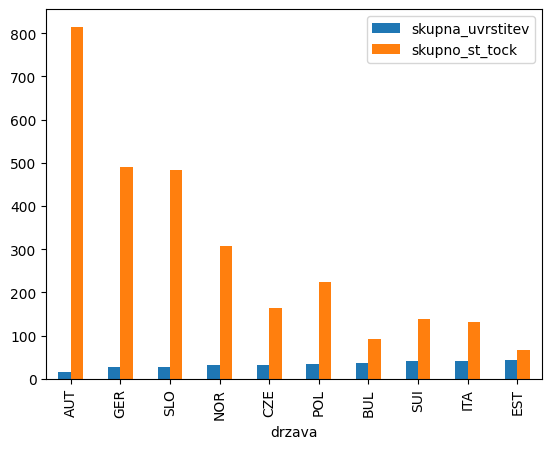

In [23]:
#S to funkcijo sem pogledala kakšne so bile povprečne uvrstitve v skupnem seštevku in seštevku smucarskih poletov za posamezno državo v 2024
world_cup_2024 = world_cup[world_cup['leto'] == 2024]
povprecja_2024 = world_cup_2024.groupby('drzava').mean(numeric_only= True)
samo_zeljene_vrednosti = povprecja_2024[['skupna_uvrstitev', 'skupno_st_tock']]
urejeno_skupno_2024 = samo_zeljene_vrednosti.sort_values(by='skupna_uvrstitev', ascending=True)
print(urejeno_skupno_2024.head(10))
urejeno_skupno_2024.head(10).plot.bar()

#za smucarske polete
samo_za_polete = povprecja_2024[['poleti_uvrstitev', 'poleti_st_tock']]
urejeno_polete_2024 = samo_za_polete.sort_values(by='poleti_uvrstitev', ascending=True)
print(urejeno_polete_2024.head(10))

Vidimo, da je bila v prejšnji sezoni daleč najuspešnejša država Avstrija ter da so tako Slovenci kot Poljaki boljši v poletih kot v skokih, medtem ko za Nemce velja ravno obratno. Iz grafa pa vidimo, da se vrstni red glede na povprečno uvrstitev razlikuje od vrstnega reda glede na skupno število točk.

In [24]:
#S to funkcijo sem predstavila koliko tekmovalcev vsake države je bilo med najboljšimi desetimi za vsako leto posebej
najboljsih_10 = world_cup[world_cup['skupna_uvrstitev'] <= 10]
prestej_tekmovalce = najboljsih_10.groupby(['leto', 'drzava']).size().reset_index(name='st_tekmovalcev')
pivot_tabela = prestej_tekmovalce.pivot(index='drzava', columns='leto', values='st_tekmovalcev')
pivot_tabela_brez_nan = pivot_tabela.fillna(0).astype(int) #da ni v tabeli NaN ampak je 0
pivot_tabela_preurejeno = pivot_tabela_brez_nan.sort_values(by=2015, ascending=False) #da imam v padajočem vrstnem letu glede na 2024
print(pivot_tabela_preurejeno)

leto    2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
drzava                                                            
AUT        3     2     3     1     1     2     0     2     3     3
NOR        2     4     1     4     2     2     3     2     1     2
CZE        1     0     0     0     0     0     0     0     0     0
GER        1     2     2     3     2     2     2     2     1     2
JPN        1     1     0     0     1     1     1     1     1     1
POL        1     0     2     2     3     2     3     0     2     0
SLO        1     1     2     0     1     1     1     3     2     2


S tem lahko vidimo, da so bili v zadnjih 10 letih med najboljšimi desetimi v svetovnem pokalu predstavniki iz samo sedmih držav in da sta najuspešnejši Norveška in Avstrija.

In [25]:
#S to funkcijo sem naredila tabelo, v kateri so zapisani priimki 10 najboljših v skupnem seštevku za vsako leto.
najboljsi_skakalci = pd.DataFrame() #najprej sem naredila prazno tabelo v katero sem z for-zanko dodali priimke
for leto in [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    najboljsi = world_cup[world_cup['leto'] == leto].sort_values(by='skupna_uvrstitev').head(10)
    najboljsi_skakalci[leto] = najboljsi['priimek'].values
print(najboljsi_skakalci)

             2015      2016          2017          2018          2019  \
0          Freund     Prevc         Kraft         Stoch     Kobayashi   
1           Prevc    Freund         Stoch       Freitag         Kraft   
2           Kraft   Gangnes         Tande         Tande         Stoch   
3        Fannemel  Hayboeck     Wellinger         Kraft          Zyla   
4        Hayboeck   Forfang           Kot     Johansson       Kubacki   
5           Kasai     Kraft         Prevc     Wellinger     Johansson   
6        Koudelka     Tande      Hayboeck       Forfang  Eisenbichler   
7           Velta     Kasai  Eisenbichler      Stjernen       Forfang   
8           Stoch   Freitag         Prevc       Kubacki          Zajc   
9  Schlierenzauer  Fannemel       Fettner  Eisenbichler        Geiger   

         2020          2021          2022        2023       2024  
0       Kraft      Granerud     Kobayashi    Granerud      Kraft  
1      Geiger  Eisenbichler        Geiger       Kraft  Kobayas

In [26]:
#Kateri klub ima največ predstavnikov med vsemi registriranimi oz. samo med aktivnimi
prestej_klube = smucarski_skakalci.groupby('klub').count()
uredi_klube= prestej_klube.sort_values(by = 'id', ascending= False)
print(uredi_klube['id'].head(12))

samo_aktivni = smucarski_skakalci[smucarski_skakalci['status'] == 'Active']
prestej_klube_aktivnih = samo_aktivni.groupby('klub').count()
uredi_klube= prestej_klube_aktivnih.sort_values(by = 'id', ascending= False)
print(uredi_klube['id'].head(12))

klub
SK Triglav Kranj          47
Altius Nordic Ski Club    38
Einsiedeln                38
SSK Ilirija               36
Lahden Hiihtoseura        34
Puijon Hiihtoseura        33
SC Oberstdorf             27
Sk Triglav kranj          25
Courchevel                25
Sc Partenkirchen          25
SG Nickelhuette Aue       23
WSS Wisla                 23
Name: id, dtype: int64
klub
Bakuriani                         19
CLUB DES SPORTS COURCHEVEL        18
SSK ILIRIJA                       16
Chinese Ski Association           15
SSK NORICA ZIRI                   15
Belarus Ski Jumping Federation    11
Am Bachtel                        10
Sk Triglav kranj                  10
TJ Dukla Liberec                   9
SK TRIGLAV KRANJ                   9
SK ZAGORJE                         8
CSS BRASOVIA                       8
Name: id, dtype: int64


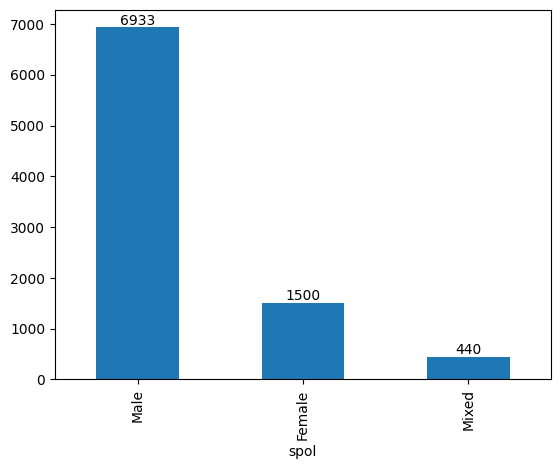

In [27]:
#S to funkcijo sem pogledala razmerje med spoli med vsemi registriranimi smučarskimi skakalci
prestej_spole = smucarski_skakalci.groupby('spol').count()
uredi_spole = prestej_spole.sort_values(by = 'id', ascending= False)
graf = uredi_spole['id'].plot.bar()
for i in graf.containers: #da sem dodala vrednosti na stolpce
    graf.bar_label(i)

Ker so med podatkih o registriranih smučarkih skakalcih tudi podatki za ekipe, obstaja še spol: Mixed(mešani). Pričakovala sem, da bodo prevladovali moški, ampak nisem pričakovala take razlike.

<Axes: ylabel='id'>

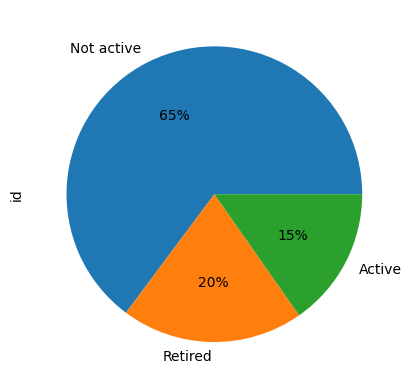

In [28]:
prestej_statuse = smucarski_skakalci.groupby('status').count()
uredi_statuse= prestej_statuse.sort_values(by = 'id', ascending= False)
uredi_statuse['id'].head(3).plot(kind='pie', autopct='%1.0f%%')

Ta graf prikazuje razmerje med aktivnimi, upokojenimi in ne-aktivnimi registriranimi smučarski skakalci.

<Axes: xlabel='spol'>

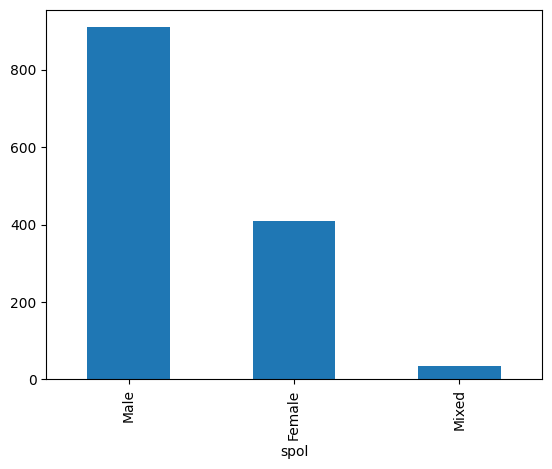

In [29]:
#Poglejmo sedaj razporeditev spolov, če gledamo samo AKTIVNE, registrirane smučarske skakalce
samo_aktivni = smucarski_skakalci[smucarski_skakalci['status'] == 'Active']
spol_aktivnih = samo_aktivni.groupby('spol').count()
uredi_spole_aktivnih = spol_aktivnih.sort_values(by = 'id', ascending= False)
uredi_spole_aktivnih['id'].plot.bar()

Iz tega vidimo, da je med aktivnimi tekmovalci razlika med številom moških in žensk manjša, saj je v zadnjih letih vedno več ženskih smučarskih skakalk, ki so v veliki večini še aktivne. Vendar pa v smučarskih skokih še vedno prevladujejo moški tekmovalci.

<Axes: xlabel='smuci'>

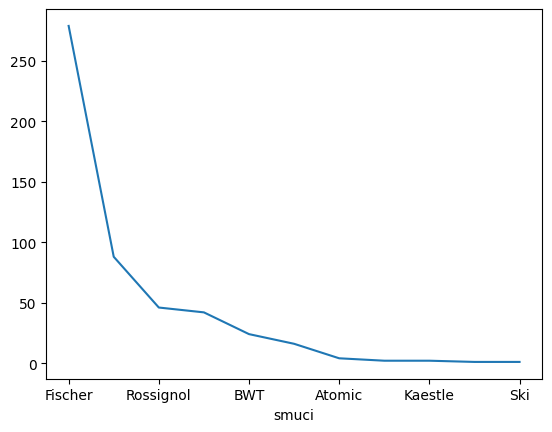

In [30]:
#Poglejmo katere znamke smuči najpogosteje uporabljajo smučarski skakalci
prestej_smuci = smucarski_skakalci.groupby('smuci').count()
uredi_smuci= prestej_smuci.sort_values(by = 'id', ascending= False)
uredi_smuci['id'].plot()

Vidimo, da velika večina tistih, ki imajo podatke o smučeh, uporablja Fischer, vendar je bilo v resnici zelo malo znanih podatkov (505).

In [31]:
smucarski_skakalci["starost"] = 2024 -smucarski_skakalci["rojstno_leto"]

S to funkcijo sem v podatke o smučarskih skakalcih dodala stolpec o starosti posamezne osebe.

In [32]:
#Poglejmo kakšne so povprečne starosti trenutno aktivnih smučarskih skakalcev v posamezni državi in koliko jih je sploh aktivnih
samo_aktivni = smucarski_skakalci[smucarski_skakalci['status'] == 'Active']
razvrstimo_po_drzavah = samo_aktivni.groupby('drzava')
povprecna_starost = razvrstimo_po_drzavah['starost'].mean()
stevilo_tekmovalcev = samo_aktivni.groupby('drzava').size().reset_index(name='stevilo_tekmovalcev')

# Združimo podatke glede na državo
zdruzena_tabela= pd.merge(povprecna_starost, stevilo_tekmovalcev, on='drzava')
koncna_tabela = zdruzena_tabela.sort_values(by='stevilo_tekmovalcev', ascending=False)

print(koncna_tabela.head(15))

                      drzava    starost  stevilo_tekmovalcev
30                  Slovenia  20.117647                  191
23                    Norway  23.885714                  142
9                    Germany  19.952756                  136
15                     Japan  22.073394                  113
27                    Russia  23.700000                   93
0                    Austria  21.000000                   80
25                    Poland  20.750000                   71
24                P.r. China  22.560606                   69
7                     France  16.841270                   65
26                   Romania  18.732143                   58
32               Switzerland  20.435897                   41
6                    Finland  21.277778                   38
4                    Czechia  17.875000                   36
16                Kazakhstan  19.740741                   29
36  United States Of America  19.291667                   25


V tej tabeli lahko vidimo, da ima Slovenija trenutno daleč največ aktivnih smučarskih skakalcev, ki so zelo mladi, povprečje vseh držav pa je okoli 20 let.

In [33]:
zdruzitev = pd.merge(world_cup, smucarski_skakalci, on= 'koda')

<Axes: ylabel='drzava_x'>

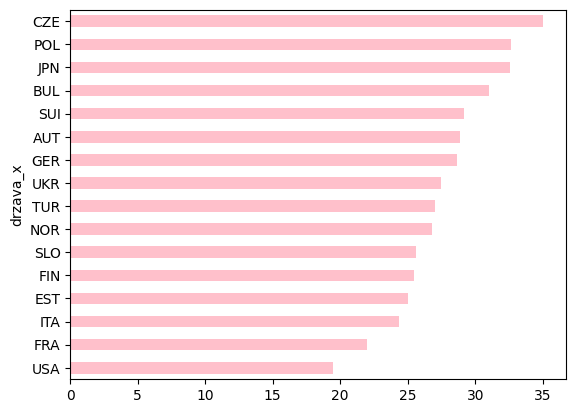

In [34]:
#Poglejmo kolikšna je bila povprečna starost v svetovnem pokalu za posamezno državo v zadnji sezoni.
leto_2024 = zdruzitev[zdruzitev['leto'] == 2024]
loci_po_drzavah = leto_2024.groupby('drzava_x')
povprecna_starost_zdruzitev = loci_po_drzavah['starost'].mean()
uredi_zdruzitev = povprecna_starost_zdruzitev.sort_values()
uredi_zdruzitev.plot(x='drzava_x', y='starost', kind='barh', color='pink')

Vidimo, da je povprečna starost v svetovnem pokalu precej višja od tiste med aktivnimi registriranimi smučarskimi skakalci. To je pričakovano, saj so registrirani že zelo mladi športniki, ki tekmujejo v svojih kategorijah, in jih je več. Iz tega grafa vidimo, da se povprečna starost najboljših smučarskih skakalcev giblje okoli 25 let.

<Axes: xlabel='leto'>

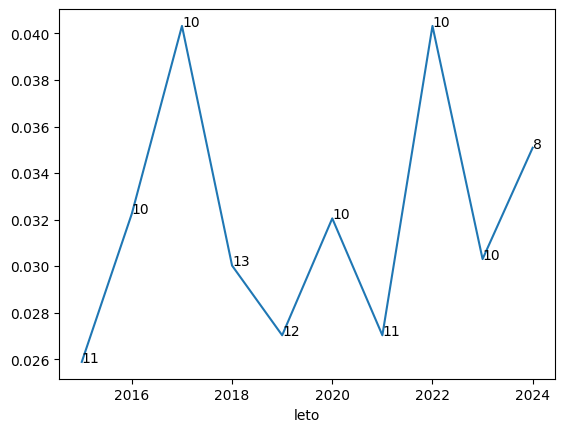

In [35]:
#Zanima me, ali se uspešnost slovenskih smučarskih skakalcev skozi leta izboljšuje.
samo_slovenci = world_cup[world_cup['drzava'] == 'SLO']
st_slovencev = samo_slovenci.groupby('leto')['drzava'].count()
vsota_uvrstitev = samo_slovenci.groupby('leto')['skupna_uvrstitev'].sum()
uspesnost = st_slovencev / vsota_uvrstitev

#S tem sem na graf dodala še koliko je bilo Slovencev v svetovnem pokalu v vsakem letu
for i in range(10):
    plt.text(uspesnost.index[i], uspesnost.values[i], f'{st_slovencev.iloc[i]}') 
uspesnost.plot()


Lahko vidimo, da je uspešnost nekoliko padla v letih, ko je sodelovalo več Slovencev. Vendar ne moremo reči, da imajo slovenski smučarski skakalci vsako leto boljše rezultate, saj ti nihajo, kar je tudi pričakovano.

<Axes: xlabel='starost', ylabel='poleti_uvrstitev'>

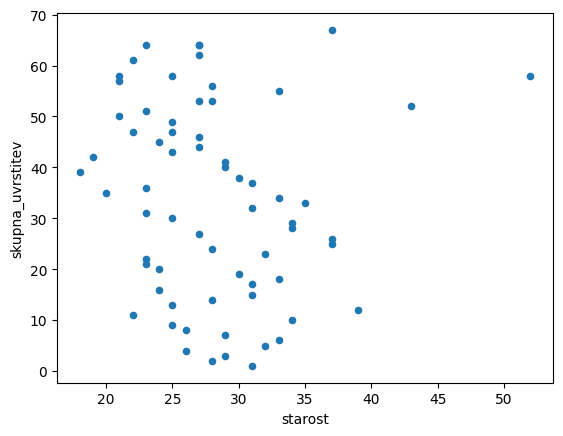

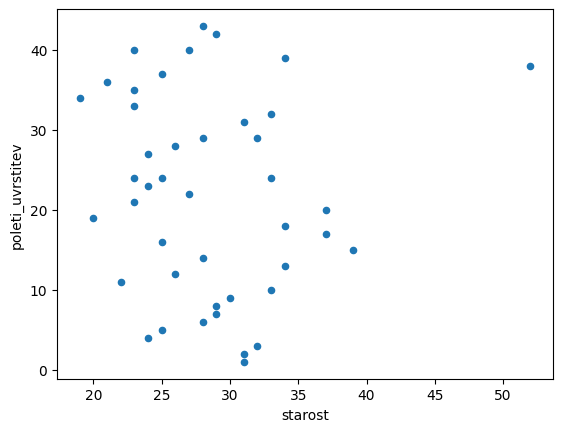

In [36]:
#Poglejmo, ali obstaja povezava med starostjo ter skupno uvrstitvijo oziroma uvrstitvijo v poletih.
leto_2024 = zdruzitev[zdruzitev['leto'] == 2024]
leto_2024.plot.scatter(x = 'starost', y = 'skupna_uvrstitev')

#za polete
leto_2024.plot.scatter(x = 'starost', y = 'poleti_uvrstitev')

Zdi se, da povezava med starostjo in uvrstitvijo ni tako očitna, vendar so najbolj uspešni smučarski skakalci med 25 in 35 leti starosti. Pri smučarskih poletih so rezultati podobni tistim v skokih.